# Introduction to GPT-4o Model

### Installing Required Libraries

In [16]:
pip install --upgrade -q openai

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip  install -q python-dotenv

Note: you may need to restart the kernel to use updated packages.


### Load Environment Variables

In [18]:
import os
import openai
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

os.environ.get('OPENAI_API_KEY')

print("API Key loaded:", os.environ.get('OPENAI_API_KEY') is not None)

API Key loaded: True


### Testing 

In [19]:
from openai import OpenAI
client = OpenAI()
MODEL='gpt-4o'

response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {'role':'system', 'content':'You are a Sci-Fi  writer.'},
        {'role':'user', 'content':'Wriete a short story about life on Earth in the year 2124.'}
    ]
)

In [20]:
print(response.choices[0].message.content)

**Title: Echoes of Tomorrow**

In the year 2124, Earth's skyline was an intricate tapestry of towering verti-skyscrapers, interconnected by gleaming transit tubes that pulsed with the gentle hum of magneto-lev trains. The air was clear, the ozone repaired, a testament to humanity's redemption from the brink of ecological disaster. Yet, while the planet thrived, society had evolved in ways unimaginable a century prior.

Dr. Elara Voss, a renowned quantum biologist, stood in her aquamarine-hued laboratory, her eyes fixated on the Holoscreen displaying the latest data from the Mars Colonization Project. Clad in a sleek, iridescent lab coat, she had dedicated the last two decades of her career to ensuring humanity's survival on the Red Planet. Her synthetic assistant, Q1, hovered nearby, its spherical form pulsating with a soft blue light.

"Elara, the latest bio-genetic array sequences from Colony 5F are ready for analysis," Q1's voice, soothing yet devoid of any real emotion, echoed in t

### Using text and image as Input to GPT-4o Model

In [21]:
pip install -q IPython

Note: you may need to restart the kernel to use updated packages.


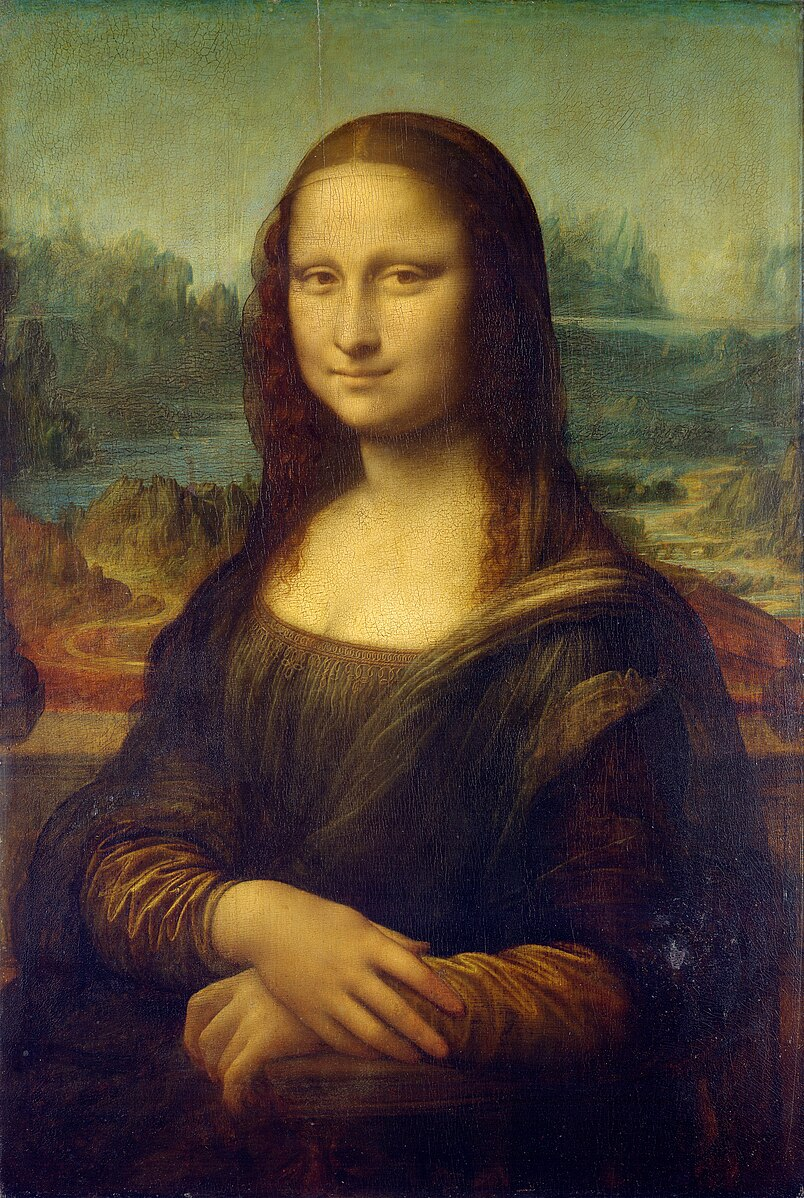

In [34]:
from IPython.display  import  Image, display
image_path =  'Mona_Lisa.jpg'
display(Image(image_path, width=600))

In [25]:
import base64
def encode_image(image_path):
    with open(image_path,'rb') as image_file:
        image_binary_data = image_file.read()
        return base64.b64encode(image_binary_data).decode("utf-8")

In [31]:
base64_image = encode_image(image_path)

system_message = '''
You are an art expert.
'''

prompt = 'Please describe this image.'

response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {'role':'system', 'content':system_message},
        {'role':'user', 'content':[
            {'type':'text','text': prompt},
            {'type':'image_url', 'image_url':{
                'url':f'data:image/jpg;base64,{base64_image}'
            }}
        ]}
    ],
    temperature=0.0
)

In [32]:
print(response.choices[0].message.content)

This image is a famous portrait painting known as the "Mona Lisa." It was created by the Italian artist Leonardo da Vinci during the Renaissance period. The painting depicts a woman with an enigmatic expression, often described as a subtle smile. She is seated with her hands crossed in front of her, and the background features a distant, dreamlike landscape with winding paths and a serene, hazy atmosphere.

The subject of the painting is dressed in dark, modest clothing, and her hair is long and dark, falling over her shoulders. The use of sfumato, a technique that creates a soft, gradual transition between colors and tones, is evident in the rendering of her face and the background, contributing to the painting's lifelike quality and depth.

The "Mona Lisa" is renowned for its artistic mastery, particularly in the areas of composition, use of light and shadow, and the portrayal of the subject's expression, which has intrigued viewers for centuries.


### Q&A App with Images and Text

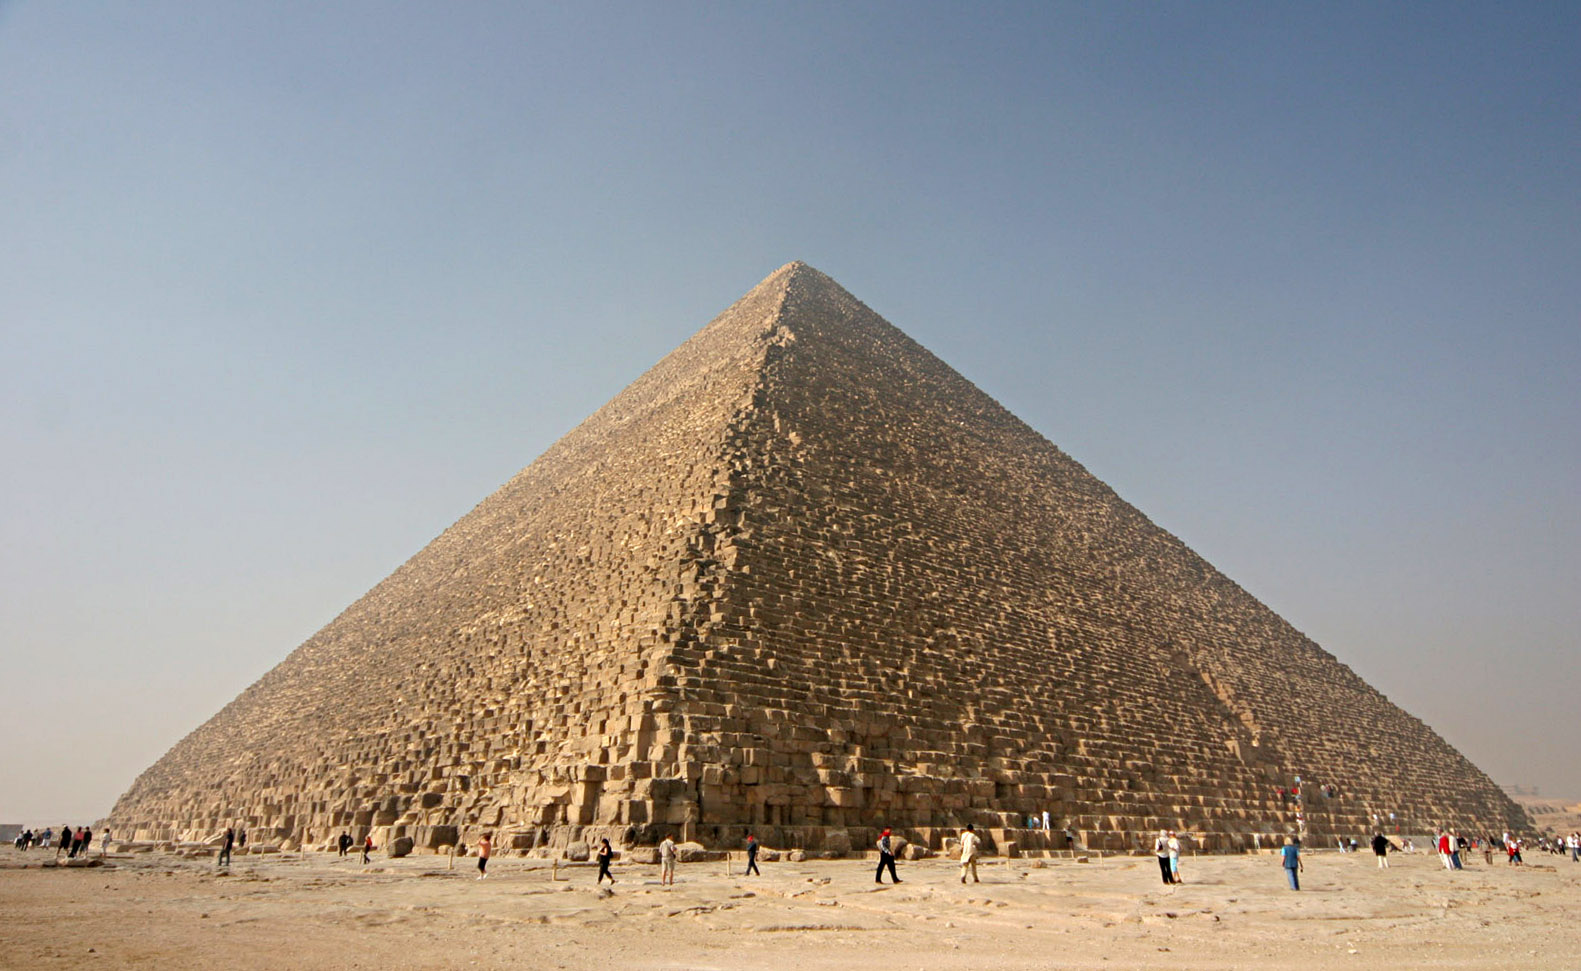

In [35]:
image_url = 'https://upload.wikimedia.org/wikipedia/commons/e/e3/Kheops-Pyramid.jpg'
display(Image(image_url, width=400))

In [36]:
system_message = 'You are an expert in ancient history.'
prompt = "What is the significance of this structure in ancient Egyption history?"

response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {'role':'system', 'content':system_message},
        {'role':'user', 'content':[
            {'type':'text','text': prompt},
            {'type':'image_url', 'image_url':{
                'url': image_url
            }}
        ]}
    ],
    temperature=0.0
)

print(response.choices[0].message.content)

The structure in the image is the Great Pyramid of Giza, also known as the Pyramid of Khufu or the Pyramid of Cheops. It is one of the most significant and iconic monuments in ancient Egyptian history for several reasons:

1. **Architectural Achievement**: The Great Pyramid is a testament to the advanced engineering and architectural skills of the ancient Egyptians. It was the tallest man-made structure in the world for over 3,800 years, standing at an original height of 146.6 meters (481 feet).

2. **Historical Significance**: Built during the Fourth Dynasty of the Old Kingdom around 2580–2560 BCE, the Great Pyramid is the oldest of the Seven Wonders of the Ancient World and the only one to remain largely intact.

3. **Cultural and Religious Importance**: The pyramid served as a tomb for the Pharaoh Khufu (Cheops), reflecting the ancient Egyptians' beliefs in the afterlife. The construction of such a grand tomb was intended to ensure the pharaoh's safe passage to the afterlife and his